# PARTIE 1 — Préparation, Nettoyage et Analyse Exploratoire des Données

## Objectif du projet

L’objectif global est de **prédire les émissions de CO₂ et la consommation énergétique** de bâtiments **non résidentiels**.
Avant toute modélisation, une **préparation rigoureuse** des données est indispensable pour garantir la fiabilité du modèle et éviter les biais.

Cette première partie consiste donc à :

- comprendre la structure du dataset  
- détecter et corriger les incohérences  
- nettoyer les données  
- filtrer les bâtiments non résidentiels  
- analyser les distributions et relations entre variables  

Elle constitue la base du futur travail de modélisation.

---

## 1️⃣ Importation des librairies et chargement du dataset

Nous importons les librairies nécessaires à l’analyse :

- **pandas / numpy** pour la manipulation de données  
- **matplotlib / seaborn** pour la visualisation  
- **display** pour l’affichage avancé

Chargement du CSV :
```Python
building_consumption = pd.read_csv('2016_Building_Energy_Benchmarking.csv')
```

Visualisation rapide des premières lignes pour voir comment un bâtiment est défini :
```Python
building_consumption.head()
```

Affichage de la taille initiale :
```Python
print("Taille initiale :", building_consumption.shape)
```

### Import des modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import display

### Analyse Exploratoire

In [3]:
building_consumption = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [4]:
# On regarde comment un batiment est défini dans ce jeu de données 
building_consumption.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [5]:
# On affiche la taille de la data
print("Taille initiale :", building_consumption.shape)

Taille initiale : (3376, 46)


## 2️⃣ Analyse des données manquantes et structure du dataset

Afin d’évaluer la qualité du dataset, nous observons :

-le type des colonnes
    
-le nombre de valeurs manquantes
    
-la cohérence générale
```python
building_consumption.info()
missing_values = building_consumption.isna().sum()
print(missing_values)
```

Cette étape sert à :

- savoir quelles colonnes sont exploitables

- anticiper un futur nettoyage ou suppression de colonnes


On observe ici :

La taille du dataset : 3376 lignes et 46 colonnes.
Les types de variables et le nombre de valeurs manquantes par colonne.

In [6]:
# On regarde le nombre de valeurs manquantes par colonne ainsi que leur type 
building_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [7]:
# Nombre de valeurs manquantes par colonne
missing_values = building_consumption.isna().sum()
print(missing_values)

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


## 3️⃣ Analyse des types de bâtiments

Le dataset contient de nombreux types de bâtiments. Cette étape permet d’identifier les catégories dominantes.
```python
building_consumption["PrimaryPropertyType"].value_counts()
```

La répartition des types de bâtiments via PrimaryPropertyType.

Ces étapes 2 & 3 permettent de comprendre rapidement la structure du jeu de données et de repérer les colonnes avec des valeurs manquantes ou inutiles.

In [8]:
# Total des type de batiment
building_consumption["PrimaryPropertyType"].value_counts()

PrimaryPropertyType
Low-Rise Multifamily           987
Mid-Rise Multifamily           564
Small- and Mid-Sized Office    293
Other                          256
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             133
High-Rise Multifamily          105
Retail Store                    91
Hotel                           77
Worship Facility                71
Distribution Center             53
Senior Care Community           45
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      25
Residence Hall                  23
Restaurant                      12
Refrigerated Warehouse          12
Hospital                        10
Laboratory                      10
Office                           3
Name: count, dtype: int64

## 4️⃣ Détection des incohérences dans les données

Nous recherchons maintenant des valeurs impossibles ou suspectes, qui peuvent nuire à la qualité du modèle.

### Incohérences recherchées :

-surfaces ≤ 0

-énergie ≤ 0

-année de construction après 2016 (date du benchmark)

-nombre d’étages ≤ 0

-nombre de bâtiments ≤ 0

-Surface des parkings supérieures à la surface totale

-Surface réellement construite supérieures à la surface totale

-LargestPropertyUseTypeGFA (Usage principal + surface) > PropertyGFATotal ((surface total brut)

#### Explication :
Cette étape permet de détecter les valeurs incohérentes ou impossibles dans les données, par exemple :

Une surface ≤ 0 ou une consommation d’énergie ≤ 0 n’a pas de sens.

Des valeurs comme LargestPropertyUseTypeGFA > PropertyGFATotal indiquent une erreur de saisie.

Ces vérifications servent à préparer un jeu de données propre pour la suite de l’analyse et l’entraînement futur d’un modèle.

In [5]:
# IDENTIFICATION DE VALEURS INCOHÉRENTES

# Bâtiments avec surface <= 0
incoherent_area = building_consumption[building_consumption["PropertyGFATotal"] <= 0]
#building_consumption["PropertyGFATotal"] <= 0 crée un masque booléen indiquant quels bâtiments ont une surface ≤ 0, 
#et building_consumption[...] sélectionne uniquement ces lignes dans le DataFrame.
print('Bâtiments avec surface <= 0 :' ,len(incoherent_area))

# Bâtiments avec consommation d'énergie <= 0
incoherent_energy = building_consumption[building_consumption["SiteEnergyUse(kBtu)"] <= 0]
print('Bâtiments avec consommation dénergie <= 0 :',len(incoherent_energy))

# Année de construction > 2016
incoherent_year = building_consumption[building_consumption["YearBuilt"] > 2016]
print('Année de construction > 2016 :',len(incoherent_year))

#Nombre de Floors
incoherent_level = building_consumption[building_consumption["NumberofFloors"] <= 0]
print('Nombre de Floors <= 0 :',len(incoherent_level))

#Nombre de Buildings
incoherent_building = building_consumption[building_consumption["NumberofBuildings"] <= 0]
print('Nombre de Buildings <= 0 :',len(incoherent_building))

# PropertyGFAParking > PropertyGFATotal
incoherent_gfa_parking = building_consumption[building_consumption["PropertyGFAParking"] > building_consumption["PropertyGFATotal"]]
print('PropertyGFAParking > PropertyGFATotal :',len(incoherent_gfa_parking))

# PropertyGFABuilding(s) > PropertyGFATotal
incoherent_gfa_building = building_consumption[building_consumption["PropertyGFABuilding(s)"] > building_consumption["PropertyGFATotal"]]
print('PropertyGFABuilding(s) > PropertyGFATotal :',len(incoherent_gfa_building))

# LargestPropertyUseTypeGFA > PropertyGFATotal
incoherent_largest_gfa = building_consumption[building_consumption["LargestPropertyUseTypeGFA"] > building_consumption["PropertyGFATotal"]]
print('LargestPropertyUseTypeGFA > PropertyGFATotal :',len(incoherent_largest_gfa))

Bâtiments avec surface <= 0 : 0
Bâtiments avec consommation dénergie <= 0 : 18
Année de construction > 2016 : 0
Nombre de Floors <= 0 : 16
Nombre de Buildings <= 0 : 92
PropertyGFAParking > PropertyGFATotal : 0
PropertyGFABuilding(s) > PropertyGFATotal : 0
LargestPropertyUseTypeGFA > PropertyGFATotal : 339


## 5️⃣ Visualisation initiale des distributions

Avant tout nettoyage, il est important de voir la forme des variables clés.

Distribution de la consommation énergétique :
```python
sns.histplot(building_consumption["SiteEnergyUse(kBtu)"], bins=50)
```
Relation entre surface et consommation :
```python
sns.scatterplot(data=building_consumption, x="PropertyGFATotal", y="SiteEnergyUse(kBtu)")
```
Boxplot par type de bâtiment :
```python
sns.boxplot(data=building_consumption, x="PrimaryPropertyType", y="SiteEnergyUse(kBtu)")
```

#### a) Distribution de la consommation énergétique
```python
plt.figure(figsize=(8,4))
sns.histplot(building_consumption["SiteEnergyUse(kBtu)"], bins=50)
plt.title("Distribution de la consommation énergétique (kBtu)")
plt.show()
```

#### Interprétation :

La majorité des bâtiments consomment très peu d’énergie, d’où un pic important autour de 0.

Peu de bâtiments ont des consommations très élevées (outliers).

Cela indique une distribution fortement asymétrique, ce qui peut influencer les analyses statistiques ou modèles prédictifs.

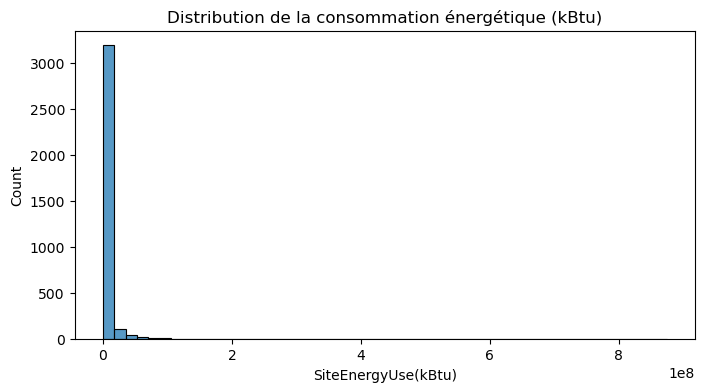

In [6]:
# Visualisation : Distribution de la target

plt.figure(figsize=(8,4))  # Crée une figure de 8x4 pouces pour rendre le graphique lisible
sns.histplot(building_consumption["SiteEnergyUse(kBtu)"], bins=50)  # Trace un histogramme de la consommation énergétique avec 50 intervalles
plt.title("Distribution de la consommation énergétique (kBtu)")  # Ajoute un titre pour expliquer ce que représente le graphique
plt.show()  

#### b) Surface totale vs consommation énergétique
```python
plt.figure(figsize=(6,5))
sns.scatterplot(data=building_consumption, x="PropertyGFATotal", y="SiteEnergyUse(kBtu)")
plt.title("Relation : Surface du bâtiment vs Consommation énergétique")
plt.show()
```

#### Interprétation :

La plupart des bâtiments sont concentrés dans la partie basse de l’axe x et y (surface et consommation faibles).

Quelques bâtiments ont des surfaces très grandes et des consommations extrêmes, créant des points isolés.

On remarque que la consommation énergétique augmente globalement avec la surface, mais des outliers très énergivores existent.

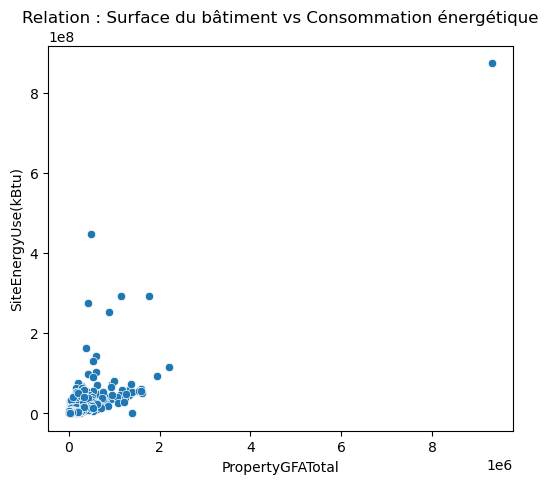

In [7]:
# Visualisation : GFA (Surface totale brute du bâtiment) vs Énergie (Consommation totale sans water normalization)

plt.figure(figsize=(6,5))
sns.scatterplot(data=building_consumption, x="PropertyGFATotal", y="SiteEnergyUse(kBtu)")
# Trace un nuage de points (scatter plot) de la surface totale vs la consommation énergétique
plt.title("Relation : Surface du bâtiment vs Consommation énergétique")
plt.show()


#### c) Consommation par type de bâtiment
```python
plt.figure(figsize=(14,5))
sns.boxplot(data=building_consumption, x="PrimaryPropertyType", y="SiteEnergyUse(kBtu)")
plt.xticks(rotation=90)
plt.title("Consommation énergétique par type de bâtiment")
plt.show()
```

#### Interprétation détaillée :

Hotel, Other, Mixed Use : boxplots relativement plats, avec quelques outliers allant jusqu’à 5 sur l'axe kBtu.

K-12 School, Self-Storage, Warehouse : consommation homogène et faible.

Hospital : consommation très élevée, boxplot s’étend jusqu’à 3 sur l'axe kBtu, montrant l’extrême variabilité.

Cette visualisation permet d’identifier les types de bâtiments les plus énergivores et les outliers

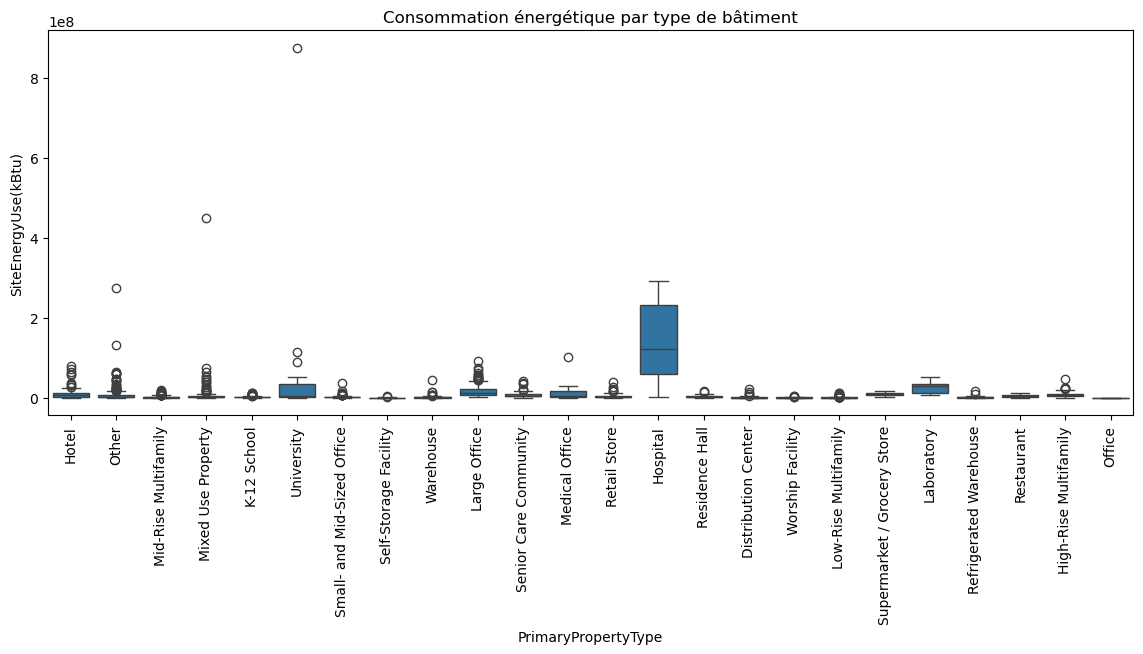

In [8]:
# Visualisations : Bax Plot par type de Bâtiment

plt.figure(figsize=(14,5))
sns.boxplot(data=building_consumption, x="PrimaryPropertyType", y="SiteEnergyUse(kBtu)")
# Trace un boxplot montrant la distribution de la consommation énergétique pour chaque type de bâtiment
plt.xticks(rotation=90)  # Fait pivoter les étiquettes de l’axe x à 90° pour qu’elles soient lisibles
plt.title("Consommation énergétique par type de bâtiment")
plt.show()


## 6️⃣ Début du nettoyage : suppression des colonnes inutiles

Trois colonnes sont supprimées car :

-peu renseignées, peu de valeurs

-non utiles pour la modélisation

-apportent du bruit dans les analyses
```python
columns_to_drop = ["Comments", "Outlier", "YearsENERGYSTARCertified"]
building_consumption_clean = building_consumption.drop(columns=columns_to_drop)
```

In [9]:
# Suppression des colonnes peu utiles
print('shape avant suppression',building_consumption.shape) # Taille avant les modifications
# Liste des colonnes à supprimer car elles sont soit vides, soit non pertinentes
columns_to_drop = ["Comments", "Outlier", "YearsENERGYSTARCertified"]
# Crée un nouveau DataFrame sans ces colonnes inutiles sans toucher à l'ancien
building_consumption_clean = building_consumption.drop(columns=columns_to_drop)
building_consumption_clean.shape

shap avant suppression (3376, 46)


(3376, 43)

## 7️⃣ Correction des valeurs incohérentes : LargestPropertyUseTypeGFA

Problème détecté :
Certains bâtiments ont une valeur "LargestPropertyUseTypeGFA" supérieure à la surface totale "PropertyGFATotal", ce qui est impossible.

Choix de correction (bonne pratique data) :

- pour chaque PrimaryPropertyType

- trouver la médiane des valeurs cohérentes

- remplacer les valeurs incohérentes par :

la médiane, ou PropertyGFATotal si la médiane dépasse (sécurité)

Ensuite on verifie avec : 
```python
incoherent_largest_gfa_clean = building_consumption_clean[building_consumption_clean["LargestPropertyUseTypeGFA"] > building_consumption_clean["PropertyGFATotal"]]
```

Les valeurs incohérentes de LargestPropertyUseTypeGFA sont remplacées par la médiane par type de bâtiment, ce qui est une bonne pratique en data cleaning pour limiter l’impact des outliers.

In [10]:
# Correction des valeurs incohérentes de LargestPropertyUseTypeGFA
 # Parcourt chaque type de bâtiment unique dans le DataFrame
for prop_type in building_consumption_clean["PrimaryPropertyType"].unique():
    # On traite chaque type de bâtiment séparément afin de calculer une médiane adaptée à chaque type de batiment
    # Ainsi, les corrections de LargestPropertyUseTypeGFA sont cohérentes avec les valeurs du même type de bâtiment.


    # Crée un masque pour sélectionner uniquement les bâtiments de ce type
    # Crée un filtre True/False qui sélectionne uniquement les bâtiments du type prop_type
    # 'prop_type' représente un type de bâtiment (ex : "Office", "Hotel", etc.),
    mask = building_consumption_clean["PrimaryPropertyType"] == prop_type

     # Crée un second masque pour identifier les bâtiments où LargestPropertyUseTypeGFA > PropertyGFATotal
     #.loc[mask, ...] filtre uniquement les lignes correspondant au type de bâtiment courant.
    mask_incoherent = (building_consumption_clean.loc[mask, "LargestPropertyUseTypeGFA"] > building_consumption_clean.loc[mask, "PropertyGFATotal"])

     # Calcule la médiane des valeurs cohérentes de LargestPropertyUseTypeGFA pour ce type de bâtiment
     # On utilise mask & ~mask_incoherent pour ne garder que les lignes valides (cohérentes).
    median_gfa = building_consumption_clean.loc[
        mask & ~mask_incoherent, "LargestPropertyUseTypeGFA"
    ].median()

    # Corrige les valeurs incohérentes : remplace par la médiane si elle est inférieure à PropertyGFATotal, sinon prend PropertyGFATotal
    building_consumption_clean.loc[mask & mask_incoherent, "LargestPropertyUseTypeGFA"] = \
        building_consumption_clean.loc[mask & mask_incoherent, "PropertyGFATotal"].apply(
            lambda total: min(median_gfa, total)
        )
    # Corrige les valeurs incohérentes de LargestPropertyUseTypeGFA :
    # - mask & mask_incoherent sélectionne uniquement les lignes du type courant
    #   dont la valeur est incohérente (LargestPropertyUseTypeGFA > PropertyGFATotal).
    # - .loc[...] = permet de remplacer précisément ces cellules.
    # - Pour chaque ligne, on remplace la valeur incohérente par le minimum entre (median_gfa, PropertyGFATotal),
    #   ce qui garantit que la valeur corrigée n’excède jamais la surface totale du bâtiment



In [58]:
incoherent_largest_gfa_clean = building_consumption_clean[building_consumption_clean["LargestPropertyUseTypeGFA"] > building_consumption_clean["PropertyGFATotal"]]
print('LargestPropertyUseTypeGFA > PropertyGFATotal :',len(incoherent_largest_gfa_clean))

LargestPropertyUseTypeGFA > PropertyGFATotal : 0


## 8️⃣ Suppression des autres valeurs incohérentes

Nous supprimons toutes les lignes ayant :

-énergie ≤ 0

-nombre d’étages ≤ 0

-nombre de bâtiments ≤ 0

Ces valeurs sont impossibles dans la réalité.

In [12]:
# Suppression des lignes incohérentes, on garde uniquement les lignes avec des valeurs strictement positives
building_consumption_clean = building_consumption_clean[
    (building_consumption_clean["SiteEnergyUse(kBtu)"] > 0) &    # énergie positive
    (building_consumption_clean["NumberofFloors"] > 0) &         # ≥ 1 étage
    (building_consumption_clean["NumberofBuildings"] > 0)        # ≥ 1 bâtiment
]
print(building_consumption_clean.shape)

(3243, 43)


## 9️⃣ Filtrage : garder uniquement les bâtiments non résidentiels

Selon l’énoncé du projet, nous devons prédire la consommation de bâtiments non résidentiels.

Donc nous filtrons :
```python
non_residential_types = [
    "NonResidential",
    "Nonresidential COS",
    "Nonresidential WA",
    "SPS-District K-12",
    "Campus"
]

building_consumption_clean = building_consumption_clean[
    building_consumption_clean["BuildingType"].isin(non_residential_types)
]
```

Contrôle :
```python
print("Shape après nettoyage et filtrage :", building_consumption_clean.shape)
print(building_consumption_clean["BuildingType"].value_counts())
```

Après filtrage, la taille passe de 3376 lignes → 1583 lignes et 43 colonnes, ce qui est normal car on a retiré les lignes et colonnes inutiles ou incohérentes.

In [13]:
# Filtrage : on garde uniquement les bâtiments NON résidentiels
non_residential_types = [
    "NonResidential",       # Types de bâtiments non résidentiels standards
    "Nonresidential COS",   # Type spécifique non résidentiel
    "Nonresidential WA",    # Type spécifique non résidentiel
    "SPS-District K-12",    # Écoles publiques K-12
    "Campus"                # Campus
]
# Sélectionne uniquement les lignes dont le type de bâtiment est dans la liste des non résidentiels
building_consumption_clean = building_consumption_clean[building_consumption_clean["BuildingType"].isin(non_residential_types)]
print(building_consumption_clean.shape)

(1583, 43)


### Visuel des modification

In [14]:
# 5️⃣ Affichage de contrôle
# Affiche le nombre de lignes et colonnes restants
print("Shape après nettoyage et filtrage :", building_consumption_clean.shape)

# Affiche la répartition des types de bâtiment restants
print("\nRépartition des BuildingType après filtrage :")
print(building_consumption_clean["BuildingType"].value_counts())

Shape après nettoyage et filtrage : (1583, 43)

Répartition des BuildingType après filtrage :
BuildingType
NonResidential        1399
SPS-District K-12       84
Nonresidential COS      77
Campus                  22
Nonresidential WA        1
Name: count, dtype: int64


In [20]:
building_consumption_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1583 entries, 0 to 3375
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1583 non-null   int64  
 1   DataYear                         1583 non-null   int64  
 2   BuildingType                     1583 non-null   object 
 3   PrimaryPropertyType              1583 non-null   object 
 4   PropertyName                     1583 non-null   object 
 5   Address                          1583 non-null   object 
 6   City                             1583 non-null   object 
 7   State                            1583 non-null   object 
 8   ZipCode                          1567 non-null   float64
 9   TaxParcelIdentificationNumber    1583 non-null   object 
 10  CouncilDistrictCode              1583 non-null   int64  
 11  Neighborhood                     1583 non-null   object 
 12  Latitude                 

## 🔟 Analyse statistique après nettoyage
Statistiques globales :
```python
building_consumption_clean[["SiteEnergyUse(kBtu)", "PropertyGFATotal"]].describe()
```
Par type de bâtiment :
```python
building_consumption_clean.groupby("PrimaryPropertyType")["SiteEnergyUse(kBtu)"].describe()
building_consumption_clean.groupby("PrimaryPropertyType")["PropertyGFATotal"].describe()
```

"groupby("PrimaryPropertyType")" Regroupe les lignes du DataFrame par le type de propriété principal (PrimaryPropertyType).
Chaque groupe correspond à un type de bâtiment : bureaux, école, hôtel, etc.

On sélectionne la colonne de consommation énergétique totale du site pour chaque bâtiment.


#### Explication :

On obtient les statistiques de base : moyenne, écart-type, min, max, quartiles.

Cela permet de comprendre la répartition et la variabilité de la consommation énergétique et des surfaces après nettoyage.

On peut détecter la présence d’outliers encore existants et voir la répartition par type de bâtiment.

In [15]:
# Calcule les statistiques descriptives des colonnes SiteEnergyUse(kBtu) et PropertyGFATotal pour l’ensemble du DataFrame.
building_consumption_clean[["SiteEnergyUse(kBtu)", "PropertyGFATotal"]].describe()

,SiteEnergyUse(kBtu),PropertyGFATotal
count,1.583000e+03,1.583000e+03
mean,7.865553e+06,1.111546e+05
std,2.185904e+07,1.900064e+05
min,1.680890e+04,1.128500e+04
25%,1.231104e+06,2.920000e+04
50%,2.547848e+06,4.835000e+04
75%,6.851194e+06,1.036315e+05
max,4.483853e+08,2.200000e+06


In [16]:
# # Regroupe les lignes par PrimaryPropertyType puis calcule les statistiques descriptives de SiteEnergyUse(kBtu) pour chaque groupe.
building_consumption_clean.groupby("PrimaryPropertyType")["SiteEnergyUse(kBtu)"].describe()

,count,mean,std,min,25%,50%,75%,max
PrimaryPropertyType,,,,,,,,
Distribution Center,53.0,2.405360e+06,3.794992e+06,1.501678e+05,6.597619e+05,1.157976e+06,2.581742e+06,2.179583e+07
Hospital,9.0,1.570480e+08,1.002710e+08,4.270962e+07,6.809073e+07,1.434230e+08,2.538325e+08,2.930908e+08
Hotel,73.0,1.078180e+07,1.443377e+07,5.037447e+05,3.611538e+06,6.042400e+06,1.106192e+07,8.046922e+07
K-12 School,125.0,3.076938e+06,2.564170e+06,1.613634e+05,1.564892e+06,2.128459e+06,3.485866e+06,1.356777e+07
Laboratory,8.0,2.349580e+07,1.642822e+07,7.251589e+06,1.104387e+07,1.820558e+07,3.439450e+07,5.316616e+07
Large Office,169.0,1.745049e+07,1.491180e+07,1.363192e+06,7.046346e+06,1.323905e+07,2.207806e+07,9.293764e+07
Low-Rise Multifamily,3.0,1.961246e+06,1.835341e+06,1.082004e+05,1.052691e+06,1.997182e+06,2.887768e+06,3.778355e+06
Medical Office,34.0,1.171744e+07,1.803966e+07,8.174096e+05,1.998402e+06,5.279340e+06,1.549758e+07,1.026737e+08
Mixed Use Property,107.0,1.175652e+07,4.470446e+07,2.298564e+05,1.156352e+06,2.371575e+06,6.361615e+06,4.483853e+08


In [17]:
building_consumption_clean.groupby("PrimaryPropertyType")["PropertyGFATotal"].describe()

,count,mean,std,min,25%,50%,75%,max
PrimaryPropertyType,,,,,,,,
Distribution Center,53.0,64481.962264,62169.007968,16300.0,28144.00,48001.0,73335.00,411584.0
Hospital,9.0,684237.888889,500514.040611,285333.0,351530.00,415632.0,879000.00,1765970.0
Hotel,73.0,143281.301370,170734.854651,20571.0,57800.00,98634.0,155602.00,994212.0
K-12 School,125.0,76424.344000,65954.745027,20811.0,38297.00,51672.0,75214.00,367884.0
Laboratory,8.0,101796.375000,74509.811176,34416.0,44197.25,78717.5,131311.00,241159.0
Large Office,169.0,358199.502959,325533.448572,102290.0,157941.00,243334.0,413264.00,1952220.0
Low-Rise Multifamily,3.0,56893.000000,32046.215798,32100.0,38800.00,45500.0,69289.50,93079.0
Medical Office,34.0,164016.264706,170921.581349,23595.0,37287.00,79204.5,272847.50,690158.0
Mixed Use Property,107.0,100086.299065,173307.889810,14101.0,27755.00,42172.0,80992.50,1206670.0


## 1️⃣1️⃣ Visualisations finales

Relations entre variables
```python
building_consumption_clean["SiteEnergyUse(kBtu)"].hist()
building_consumption_clean["PropertyGFATotal"].hist()

sns.boxplot(data=building_consumption_clean, x="PrimaryPropertyType", y="SiteEnergyUse(kBtu)")
```

#### a) Histogramme SiteEnergyUse(kBtu)

#### Interprétation :

La majorité des bâtiments ont une consommation très faible (pic près de 0–0,5 en millions de kbtu).

Quelques valeurs isolées dépassent 1, mais elles sont rares.

La distribution reste très asymétrique.

<Axes: >

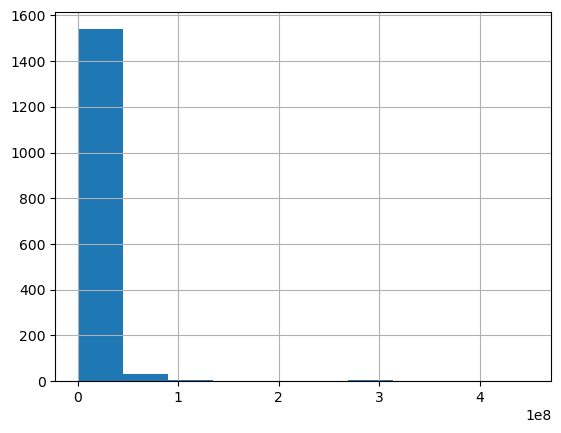

In [18]:
# Trace un histogramme simple de la colonne SiteEnergyUse(kBtu) pour visualiser la répartition de la consommation énergétique
building_consumption_clean["SiteEnergyUse(kBtu)"].hist()

#### b) Histogramme PropertyGFATotal

#### Interprétation :

La surface des bâtiments est concentrée entre 0 et 0,2×10⁶.

Quelques bâtiments ont des surfaces très grandes mais ces cas sont rares.

Cela confirme l’existence de bâtiments exceptionnels (outliers) dans la surface.

<Axes: >

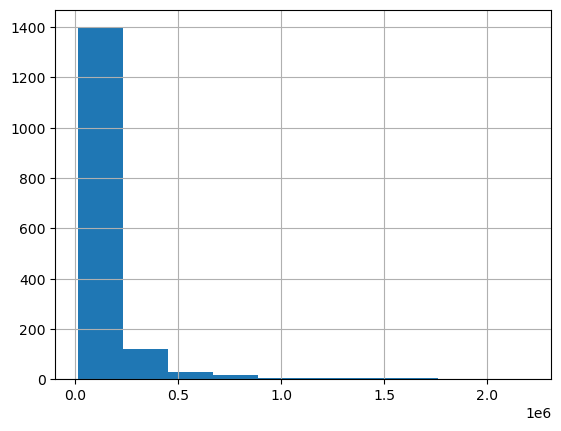

In [19]:
# Trace un histogramme simple de la colonne PropertyGFATotal pour visualiser la répartition des surfaces totales des bâtiments
building_consumption_clean["PropertyGFATotal"].hist()

#### c) Boxplot par type de bâtiment

#### Interprétation :

Hotel, Mixed Use, Other : grande variabilité, présence de points extrêmes.

K-12 School, Self-Storage, Warehouse : faible variabilité, boxplots plats.

Hospital : consommation élevée et très variable, Q1 = 0,5, médiane = 1,4, Q3 = 3.

Large Office : boxplot jusqu’à 0,5, points jusqu’à 1.

Cette visualisation permet d’identifier les types de bâtiments énergivores et homogènes, et de détecter visuellement les outliers.

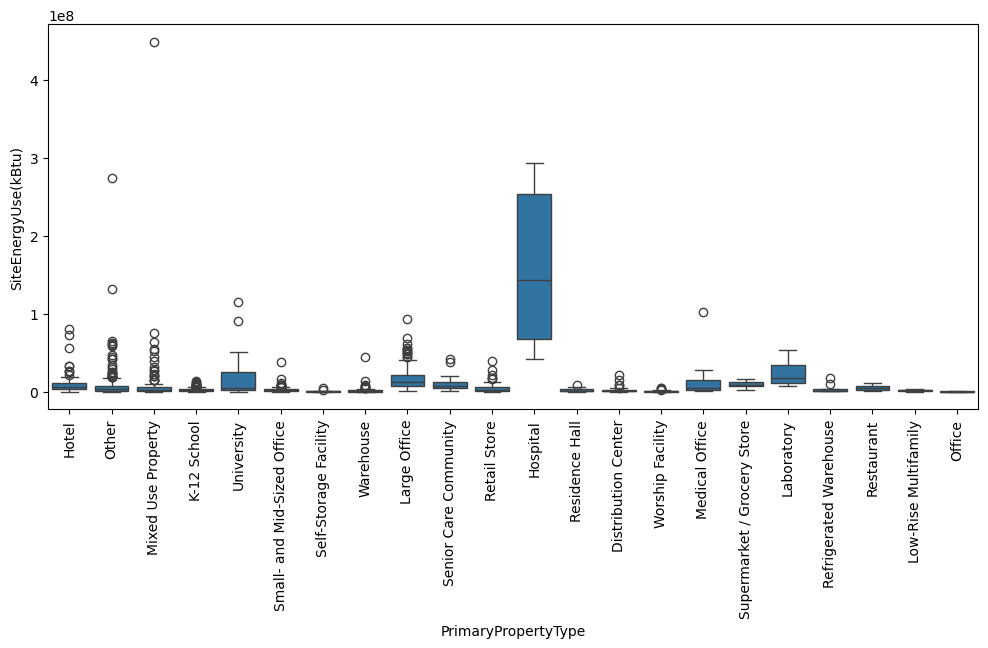

In [20]:
plt.figure(figsize=(12,5))
# Trace un boxplot montrant la distribution de la consommation énergétique pour chaque type de bâtiment
sns.boxplot(data=building_consumption_clean,
            x="PrimaryPropertyType",
            y="SiteEnergyUse(kBtu)")
# Fait pivoter les étiquettes de l’axe x à 90° pour qu’elles soient lisibles
plt.xticks(rotation=90)
plt.show()


In [21]:
building_consumption_clean['PropertyGFATotal'].describe()

count    1.583000e+03
mean     1.111546e+05
std      1.900064e+05
min      1.128500e+04
25%      2.920000e+04
50%      4.835000e+04
75%      1.036315e+05
max      2.200000e+06
Name: PropertyGFATotal, dtype: float64

#### TERMINER L'ANALYSE EXPLORATOIRE 

A réaliser : 
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

# Modélisation 

### Import des modules 

In [22]:
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, 
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

### Feature Engineering

A réaliser :
 Enrichir le jeu de données actuel avec de nouvelles features issues de celles existantes. 

# PARTIE 2 — Feature Engineering : Création, justification et analyse des nouvelles variables
## Rappel

L’objectif de ce projet est de prédire les émissions de CO₂ et la consommation totale d’énergie de bâtiments non résidentiels situés à Seattle.
Pour y parvenir, nous devons transformer les données brutes en informations plus utiles pour un modèle de machine learning.

Les données initiales contiennent beaucoup de colonnes administratives et techniques, mais toutes ne sont pas informatives pour expliquer les émissions ou la consommation d’énergie.
La qualité du modèle dépend donc fortement de la pertinence des variables utilisées.

## Pourquoi faire du Feature Engineering ?

Le Feature Engineering consiste à créer de nouvelles variables à partir des données existantes pour :

- mieux représenter les caractéristiques réelles des bâtiments,

- capturer des phénomènes physiques, architecturaux ou énergétiques,

- simplifier ou regrouper des informations complexes,

- fournir au modèle des indicateurs plus explicites,

- augmenter sa capacité à apprendre.

Les nouvelles variables créées doivent avoir un sens énergétique et être liées aux objectifs du projet.

Dans cette étape, nous avons créé six nouvelles features.

##  1. Les features créées, leur logique et leur intérêt énergétique
### 1️⃣ BuildingAge — Âge du bâtiment

#### Pourquoi cette feature est pertinente ?

L'âge d’un bâtiment impacte fortement :

- le niveau d'isolation thermique, souvent mauvais dans les bâtiments anciens,

- les normes énergétiques (beaucoup plus strictes depuis 2000),

- l'efficacité des systèmes de chauffage / ventilation,

- la qualité des fenêtres, murs, toiture,

- la probabilité de rénovations.

En général :

- bâtiment ancien = plus énergivore → plus d’émissions,

- bâtiment récent = meilleure efficacité énergétique.

##### Impact direct sur la prédiction :

✔ la consommation totale d’énergie
✔ les émissions de CO₂

### 2️⃣ IsHistoric — Indicateur “bâtiment historique”

#### Pourquoi c’est pertinent ?

Les bâtiments historiques ont souvent :

- une architecture ancienne, difficile à isoler,

- des contraintes patrimoniales limitant les rénovations,

- des systèmes énergétiques anciens.

Ils sont donc moins efficaces énergétiquement, ce qui peut :

- augmenter leur consommation,

- augmenter leurs émissions de CO₂ par m².

##### Impact direct sur la prédiction :

✔ Permet d'identifier les bâtiments très énergivores
✔ Renforce la précision sur les valeurs extrêmes

### 3️⃣ SizeCategory — Catégorie de taille (Small / Medium / Large)

#### Pourquoi c’est pertinent ?

La taille influence fortement :

- la quantité totale d’énergie nécessaire pour chauffer ou refroidir,

- le volume d’air à gérer,

- les systèmes installés (complexité, puissance).

En général :

- grand bâtiment = grande consommation → grandes émissions

- mais potentiellement moins d’émissions par m² (effet d’échelle)

**Effect d'echelle** : Un bâtiment deux fois plus grand ne consomme pas deux fois plus par m².Parce que certains coûts énergétiques ne se multiplient pas avec la surface.

Par exemple :

- Les grosses infrastructures (chaudière, ventilation) sont plus efficaces dans les grands bâtiments.

- Les pertes de chaleur proportionnellement à la surface diminuent (le ratio surface / volume baisse).

- Les très grands bâtiments utilisent des systèmes centralisés et optimisés, souvent mieux isolés.



##### Impact direct sur la prédiction :

✔ Améliore la prédiction des émissions totales
✔ Permet au modèle de distinguer les bâtiments atypiquement grands

### 4️⃣ FloorsPer1000GFA — Ratio étages / surface

### Pourquoi c’est pertinent ?

Ce ratio mesure la compacité verticale du bâtiment :

- Bâtiment très vertical → beaucoup d'étages pour peu de surface au sol.

- Bâtiment étalé → peu d'étages pour beaucoup de surface.

La compacité influence :

- les échanges thermiques avec l’extérieur,

- les besoins en ventilation,

- la circulation de l’air,

- l’énergie nécessaire à la montée de température.

En énergie :

- bâtiments massifs/compacts ⇒ mieux isolés, moins de pertes

- bâtiments étalés ⇒ surface d’échange plus grande ⇒ plus énergivores

##### Impact direct sur la prédiction :

✔ Donne une information robuste sur les déperditions thermiques
✔ Très utile pour expliquer l’intensité énergétique

### 5️⃣ IsLargeBuilding — Indicateur binaire “Grand bâtiment”

#### Pourquoi c’est pertinent ?

Cela revient à repérer les bâtiments :

- très grands,

- susceptibles d’avoir des consommations d’énergie très élevées,

- souvent équipés de systèmes HVAC (Heating, Ventilation and Air Conditioning) puissants,

- pouvant avoir plusieurs usages différents.

C’est utile car les modèles n’apprennent pas toujours bien avec seulement une variable continue comme la surface.

##### Impact direct sur la prédiction :

✔ Améliore la gestion des valeurs extrêmes
✔ Renforce la robustesse sur les grandes surfaces

### 6️⃣ NumUseTypes — Nombre de types d’usage combinés

#### Pourquoi cette feature est essentielle ?

Les bâtiments à usages multiples :

- ont des besoins énergétiques complexes et variés,

- consomment plus d’énergie (restaurant + bureau + commerce),

- ont des horaires d’occupation plus longs,

- ont plusieurs systèmes HVAC.

Exemple :

- un immeuble juste bureau : 1 usage

- un centre commercial + parking + food court : 3 ou 4 usages

##### Impact direct sur la prédiction :

✔ Explique les consommations élevées
✔ Précise les émissions pour les bâtiments mixte

In [23]:
# 1) BUILDING AGE

# on part de building_consumption_clean (issu de l'étape 1)
df = building_consumption_clean.copy()

df['BuildingAge'] = df['DataYear'] - df['YearBuilt']
df.loc[df['BuildingAge'] < 0, 'BuildingAge'] = np.nan  # sécurité si données invalides


# ============================
# 2) HISTORIC FLAG
# ============================

df['IsHistoric'] = (df['YearBuilt'] < 1980).astype(int)


# ============================
# 3) SIZE CATEGORY (Small / Medium / Large)

#quantiles = df['PropertyGFATotal'].quantile([0.25, 0.75]).values
#q1, q2 = quantiles[0], quantiles[1]
q1 = 29200
q2 = 103000

def size_cat(gfa):
    if pd.isna(gfa):
        return 'Unknown'
    elif gfa <= q1:
        return 'Small'
    elif gfa <= q2:
        return 'Medium'
    else:
        return 'Large'

df['SizeCategory'] = df['PropertyGFATotal'].apply(size_cat)



# 4) FLOOR DENSITY (verticalité du bâtiment)

df['FloorsPer1000GFA'] = df['NumberofFloors'] / (df['PropertyGFATotal'] / 10000)
df['FloorsPer1000GFA'] = df['FloorsPer1000GFA'].replace([np.inf, -np.inf], np.nan)
df.loc[df['FloorsPer1000GFA'] > 100, 'FloorsPer1000GFA'] = np.nan



# ============================
# 5) LARGE BUILDING FLAG
# ============================

# logique simple : large = plus de 100 000 sqft
size_75 = df['PropertyGFATotal'].quantile(0.75)
df['IsLargeBuilding'] = (df['PropertyGFATotal'] >= size_75).astype(int)


# ============================
# 6) NumUseTypes (compte des usages dans ListOfAllPropertyUseTypes)

def count_uses(x):
    if pd.isna(x):
        return 0
    # séparer par ',' et strip
    parts = [p.strip() for p in str(x).split(',') if p.strip() != '']
    return len(parts)

df['NumUseTypes'] = df['ListOfAllPropertyUseTypes'].apply(count_uses)


# ============================
# Liste finale des colonnes
# ============================

new_cols = [
    'BuildingAge',
    'IsHistoric',
    'SizeCategory',
    'FloorsPer1000GFA',
    'IsLargeBuilding',
    'NumUseTypes'
]


### 2. Analyse des résultats obtenus
##### ✔ Aucun manque de données
```python
BuildingAge         0
IsHistoric          0
SizeCategory        0
FloorsPer1000GFA    0
IsLargeBuilding     0
NumUseTypes         0
```

➡️ Les features sont propres, aucune valeur manquante.
➡️ Totalement prêt pour la modélisation.

##### Distribution des catégories de taille

C’est une étape essentielle pour: 

- valider la qualité de la feature
- vérifier son utilité dans la modélisation
- éviter des biais dans le modèle

```python
SizeCategory
Medium    790
Large     397
Small     396
```
✔ Répartition très équilibrée entre Small et Large
✔ Medium plus représentée mais pas problématique (classe centrale)
Rien d’anormal : en prenant 25% / 75%, la catégorie "Medium" regroupe naturellement les 50% du milieu.

Cela reste parfaitement acceptable pour un modèle ML.

Note sur le choix des seuils :

- Les valeurs pour Medium et Large sont conformes à la réalité des bâtiments non résidentiels à Seattle.

- La catégorie Small est légèrement surévaluée par rapport aux standards, mais ce choix permet d’avoir des classes suffisamment représentées pour le modèle ML, garantissant que toutes les catégories soient apprises correctement.

Il faut s’assurer que l’une des catégories ne domine pas toutes les autres, et qu'il n’y a pas de groupes trop petits,


➡️ Il n’y a aucun déséquilibre critique.
➡️ Bonne variabilité des tailles de bâtiments.

##### Analyse statistique describe

Ce qu’on peut retenir :

- BuildingAge varie de 1 an à 116 ans, ce qui donne un bon éventail.

- FloorsPer1000GFA va jusqu’à 45, ce qui correspond à des tours très verticales.

- NumUseTypes va jusqu’à 13, ce qui reflète des bâtiments très multi-usages.

- Les distributions sont cohérentes avec la typologie des bâtiments d’une grande ville.

Conclusion de l’analyse :

➡️ La variabilité des features est réellement utile pour expliquer les différences entre bâtiments.

➡️ Les features décrivent des caractéristiques physiques clés (âge, taille, verticalité, usages…) qui influencent directement la consommation d’énergie,

➡️ Elles rendent le dataset bien adapté à l’apprentissage automatique.

In [24]:
print(df[new_cols].info())
print(df[new_cols].describe(include='all'))
print(df[new_cols].isna().sum())
print(df['SizeCategory'].value_counts())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1583 entries, 0 to 3375
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BuildingAge       1583 non-null   float64
 1   IsHistoric        1583 non-null   int64  
 2   SizeCategory      1583 non-null   object 
 3   FloorsPer1000GFA  1583 non-null   float64
 4   IsLargeBuilding   1583 non-null   int64  
 5   NumUseTypes       1583 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 86.6+ KB
None
        BuildingAge   IsHistoric SizeCategory  FloorsPer1000GFA  \
count   1583.000000  1583.000000         1583       1583.000000   
unique          NaN          NaN            3               NaN   
top             NaN          NaN       Medium               NaN   
freq            NaN          NaN          790               NaN   
mean      54.260897     0.653822          NaN          0.574269   
std       32.778798     0.475901          NaN        

In [25]:
#voir les usages pour la ligne qui en a 13
uses = df.loc[df['NumUseTypes'] == 13, 'ListOfAllPropertyUseTypes'].iloc[0]
print(uses)

Fitness Center/Health Club/Gym, Office, Other - Education, Other - Recreation, Other - Restaurant/Bar, Outpatient Rehabilitation/Physical Therapy, Personal Services (Health/Beauty, Dry Cleaning, etc), Restaurant, Retail Store, Self-Storage Facility, Vocat


### Préparation des features pour la modélisation

A réaliser :
* Si ce n'est pas déjà fait, supprimer toutes les colonnes peu pertinentes pour la modélisation.
* Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.
* Débarrassez-vous des features redondantes en utilisant une matrice de corrélation.
* Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).
*  Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target).
* Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne.

# Étape 3 Préparation des features pour la modélisation


In [26]:
# ETAPE 3 : Préparation

df3 = df.copy()
print("shape initiale df3 :", df3.shape)

shape initiale df3 : (1583, 49)


In [27]:
print(df3.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'ComplianceStatus', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'B

### 1) Supprimer les colonnes inutiles

#### Explication :

Suppression des colonnes non utiles pour notre objectif, ainsi que les colonnes qui peuvent provoquer des data leak.

In [28]:
cols_to_drop = [
    'OSEBuildingID', 'DataYear','PropertyName', 'Address', 'City', 'State', 'ZipCode',
    'TaxParcelIdentificationNumber','CouncilDistrictCode',
    'Neighborhood', 'Latitude', 'Longitude','ListOfAllPropertyUseTypes',                
    'ComplianceStatus',                  
    'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
    'ThirdLargestPropertyUseType',  'ThirdLargestPropertyUseTypeGFA',
    'ENERGYSTARScore',
    'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
    'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
    'SiteEnergyUseWN(kBtu)',
    'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)',
    'NaturalGas(therms)', 'NaturalGas(kBtu)',
    'DefaultData',
    'TotalGHGEmissions', 'GHGEmissionsIntensity'
]

# Filtrer la liste pour conserver seulement les colonnes présentes (sécurité)
cols_to_drop = [c for c in cols_to_drop if c in df3.columns]

# Ne pas supprimer la target par erreur (sécurité supplémentaire)
target_col = 'SiteEnergyUse(kBtu)'
if target_col in cols_to_drop:
    cols_to_drop.remove(target_col)

# Affichage avant suppression
print("Shape avant suppression :", df3.shape)
print("Nombre de colonnes à supprimer :", len(cols_to_drop))

# Suppression
df3 = df3.drop(columns=cols_to_drop)

# Affichage après suppression
print("Shape après suppression  :", df3.shape)
print("Colonnes restantes :", df3.columns.tolist())


Shape avant suppression : (1583, 49)
Nombre de colonnes à supprimer : 32
Shape après suppression  : (1583, 17)
Colonnes restantes : ['BuildingType', 'PrimaryPropertyType', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)', 'BuildingAge', 'IsHistoric', 'SizeCategory', 'FloorsPer1000GFA', 'IsLargeBuilding', 'NumUseTypes']


### 2) Target : distribution et traitement des outliers (quantile clipping)

On analyse la distribution de la target SiteEnergyUse(kBtu) avant traitement.
La consommation est majoritairement faible à modérée (sous 10 millions de kBtu) grâce au describe, mais la distribution présente une longue queue à droite avec quelques bâtiments extrêmement énergivores. Le boxplot confirme cette forte asymétrie et la présence d’outliers marqués.

##### Conclusion

Un clipping par percentiles est pertinent pour limiter l’impact de ces valeurs extrêmes lors de l’entraînement du modèle.

##### Impact sur la prédiction

Les bâtiments très énergivores, bien que réels, sont rares et pourraient perturber la modélisation si on ne traite pas ces valeurs extrêmes. Leur gestion est donc essentielle pour obtenir un modèle plus stable et performant.

count    1.583000e+03
mean     7.865553e+06
std      2.185904e+07
min      1.680890e+04
25%      1.231104e+06
50%      2.547848e+06
75%      6.851194e+06
max      4.483853e+08
Name: SiteEnergyUse(kBtu), dtype: float64


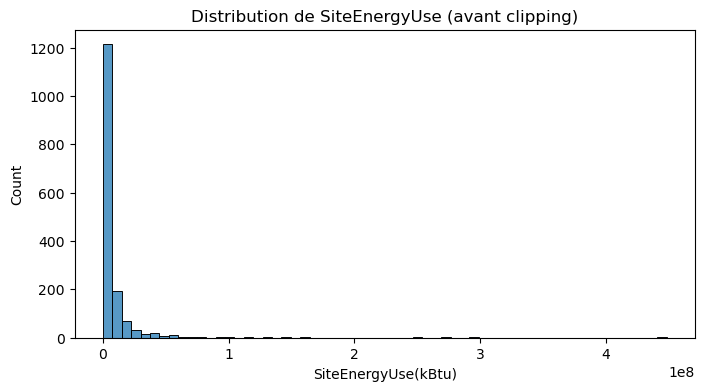

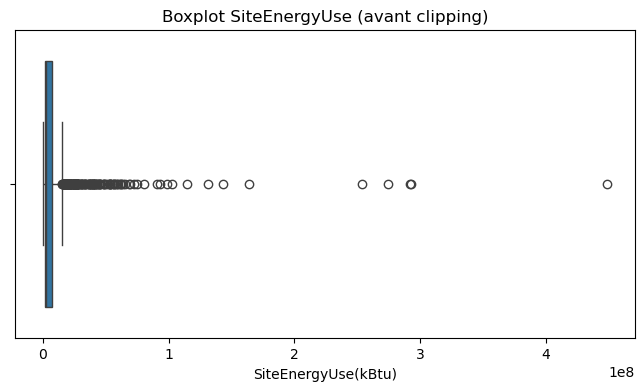

In [29]:
# description target
print(df3['SiteEnergyUse(kBtu)'].describe())

plt.figure(figsize=(8,4))
sns.histplot(df3['SiteEnergyUse(kBtu)'], bins=60)
plt.title('Distribution de SiteEnergyUse (avant clipping)')
plt.show()

# boxplot (log scale utile si très skewed)
plt.figure(figsize=(8,4))
sns.boxplot(x=df3['SiteEnergyUse(kBtu)'])
plt.title('Boxplot SiteEnergyUse (avant clipping)')
plt.show()


#### Quantile clipping (1% / 99%) — principe et code

Pourquoi 1% / 99% ?

C’est une pratique courante simple qui limite l’influence des extrêmes (outliers) sans supprimer de lignes.

1%/99% est conservateur : on ne touche qu’aux valeurs les plus extrêmes.

IQR/Z-score suppriment des lignes ; ici on préfère garder et « capping » (clipper)


#### Resultat

Pour limiter l’impact de ces valeurs extrêmes :

- J'ai choisi de clipper la target entre le 1er et le 99e percentile (SiteEnergyUse_clipped).

- Cela correspond à ramener les 16 bâtiments les moins énergivores au 1er percentile (environ 123000 kBtu) et les 16 bâtiments les plus énrgivores au 99e percentil (environ 70 071 907 kBtu).

- Après clipping, la forme générale de la distribution reste similaire, mais les valeurs extrêmes sont raisonnablement limitées, ce qui facilite l’entraînement des modèles de prédiction.

#### Impact sur la prédiction :

- On conserve l’ordre de grandeur et les tendances générales de la consommation énergétique.

- On limite l’influence des bâtiments atypiques qui pourraient biaiser l’apprentissage.

q01 = 122628.018254 q99 = 70071906.88000019
Nb en dessous q01 : 16 Nb au-dessus q99 : 16


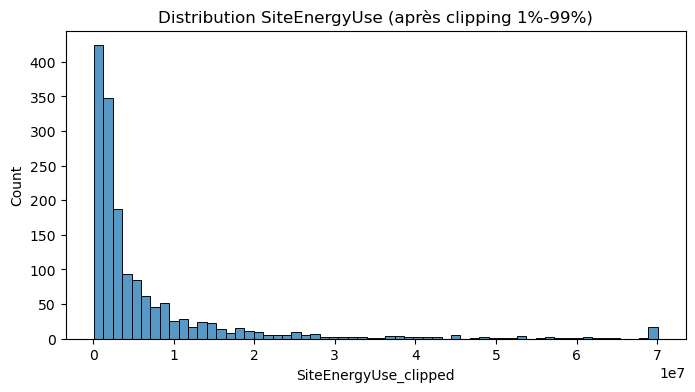

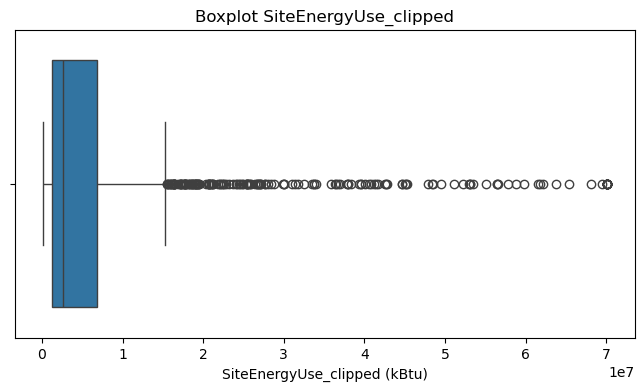


Shape finale df3 : (1583, 18)
Colonnes finales (liste complète) :
['BuildingType', 'PrimaryPropertyType', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)', 'BuildingAge', 'IsHistoric', 'SizeCategory', 'FloorsPer1000GFA', 'IsLargeBuilding', 'NumUseTypes', 'SiteEnergyUse_clipped']


In [30]:
#Traitement des outliers
q_low = df3['SiteEnergyUse(kBtu)'].quantile(0.01)
q_high = df3['SiteEnergyUse(kBtu)'].quantile(0.99)
print("q01 =", q_low, "q99 =", q_high)

# nombre de points au-delà des seuils
n_low = (df3['SiteEnergyUse(kBtu)'] < q_low).sum()
n_high = (df3['SiteEnergyUse(kBtu)'] > q_high).sum()
print("Nb en dessous q01 :", n_low, "Nb au-dessus q99 :", n_high)

# Clipping (on remplace par q01 / q99)
df3['SiteEnergyUse_clipped'] = df3['SiteEnergyUse(kBtu)'].clip(lower=q_low, upper=q_high)

# Visualiser après clipping
plt.figure(figsize=(8,4))
sns.histplot(df3['SiteEnergyUse_clipped'], bins=60)
plt.title('Distribution SiteEnergyUse (après clipping 1%-99%)')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df3['SiteEnergyUse_clipped'])
plt.title('Boxplot SiteEnergyUse_clipped')
plt.xlabel('SiteEnergyUse_clipped (kBtu)')
plt.show()

print("\nShape finale df3 :", df3.shape)
print("Colonnes finales (liste complète) :")
print(df3.columns.tolist())

### 3) Supprimer / traiter features redondantes (matrice de corrélation)

La matrice de corrélation est utile pour repérer des colonnes numériques fortement corrélées (|corr| > 0.9 par exemple). 

On l’applique aux variables numériques.

#### Que faire si on trouve des redondances ?
Si A et B corrèlent > 0.9 → garder une seule (celle la plus interprétable).

Colonnes numériques examinées : ['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'BuildingAge', 'IsHistoric', 'FloorsPer1000GFA', 'IsLargeBuilding', 'NumUseTypes']


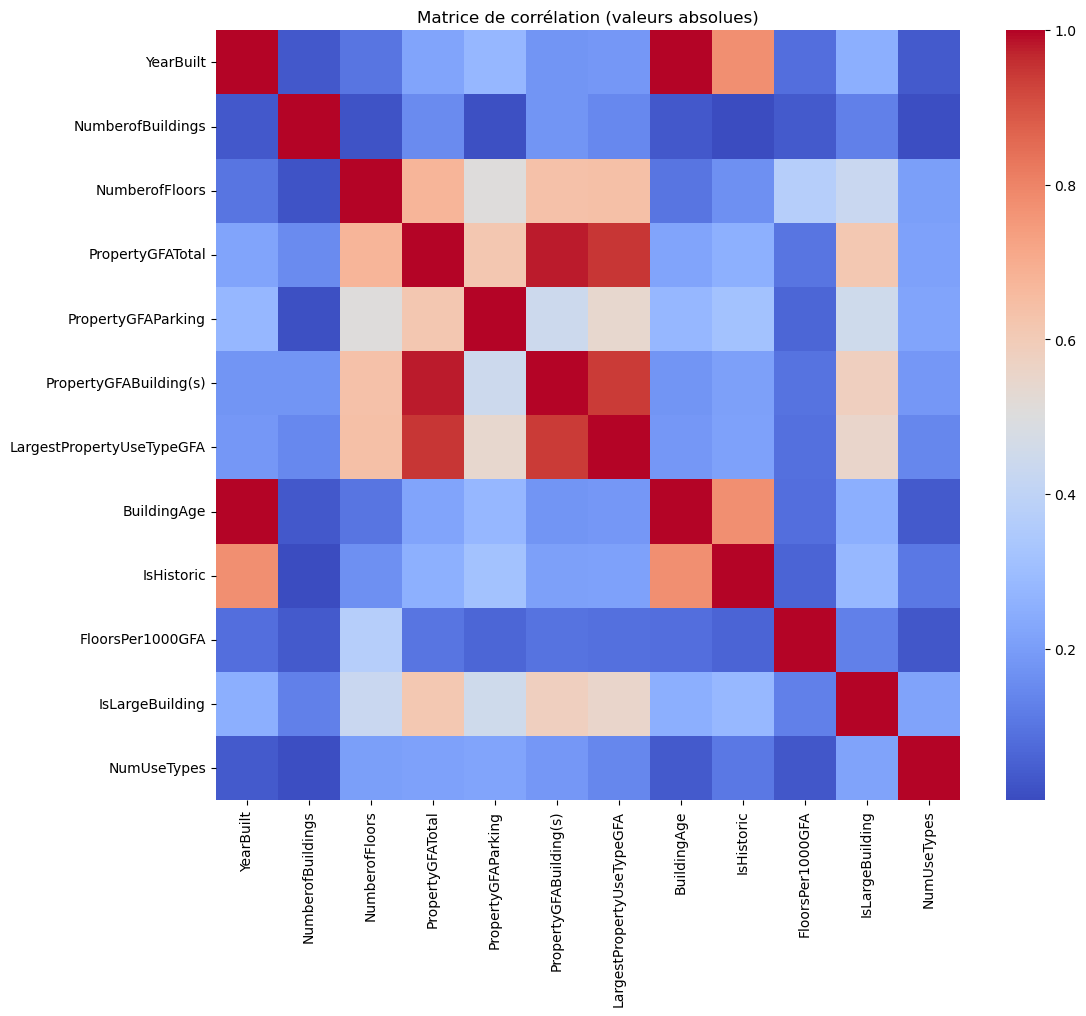

Paires fortement corrélées (>|0.9|):


,feature_1,feature_2,corr
6,YearBuilt,BuildingAge,1.000000
31,PropertyGFATotal,PropertyGFABuilding(s),0.979231
32,PropertyGFATotal,LargestPropertyUseTypeGFA,0.948158
45,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,0.938895


In [31]:
# choisir les colonnes numériques pertinentes
num_cols = df3.select_dtypes(include=[np.number]).columns.tolist()
# retirer la target brute si on veut vérifier corr entre features
num_cols = [c for c in num_cols if c not in ['SiteEnergyUse(kBtu)','SiteEnergyUse_clipped']]

print("Colonnes numériques examinées :", num_cols)

# matrice de corrélation
corr = df3[num_cols].corr().abs()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Matrice de corrélation (valeurs absolues)')
plt.show()

# repérer paires fortement corrélées (>0.9)
strong_pairs = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
                .stack()
                .reset_index()
               )
strong_pairs.columns = ['feature_1','feature_2','corr']
strong_pairs = strong_pairs[strong_pairs['corr'] > 0.9].sort_values('corr', ascending=False)
print("Paires fortement corrélées (>|0.9|):")
display(strong_pairs)


#### Analyse et suppression des features redondantes

Nous avons calculé la matrice de corrélation sur les colonnes numériques pour détecter les features fortement corrélées (|corr| > 0.9).

Plusieurs paires fortement corrélées ont été identifiées :

|      | feature_1              | feature_2                 | corr      |
|------|------------------------|---------------------------|-----------|
| 6    | YearBuilt	            |BuildingAge                | 1.000000  |
| 31   | PropertyGFATotal       | PropertyGFABuilding(s     | 0.979231  |
| 32   | PropertyGFATotal       | LargestPropertyUseTypeGFA | 0.948158  |
| 45   | PropertyGFABuilding(s) | LargestPropertyUseTypeGFA | 0.938895  |

##### Décisions prises :

BuildingAge est conservé, YearBuilt est supprimé (plus interprétable pour le modèle).

PropertyGFATotal est conservé, PropertyGFABuilding(s) et LargestPropertyUseTypeGFA sont supprimés (représentent des parties de la surface totale déjà incluse).

Après suppression, le nombre de colonnes passe de 18 à 15, ce qui réduit la redondance et facilite la modélisation.

##### Lien avec le projet :

La suppression des features redondantes permet de réduire le risque de multicolinéarité, ce qui améliore la stabilité des modèles de prédiction de consommation énergétique.

On conserve uniquement les features les plus pertinentes et interprétables, tout en conservant l’information structurelle essentielle sur les bâtiments.

In [32]:
# Suppression des features redondantes
print("shape avant suppression redondantes :", df3.shape)
to_drop_corr = [c for c in ['YearBuilt', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA'] if c in df3.columns]
df3 = df3.drop(columns=to_drop_corr)
print("shape après suppression redondantes :", df3.shape)

shape avant suppression redondantes : (1583, 18)
shape après suppression redondantes : (1583, 15)


### 4) Visualisations ciblées (boxplots & scatterplots) — ce que chercher

Trace ces graphiques pour comprendre le lien features ↔ target (on utilise la target clippée pour limiter l'impact outliers).

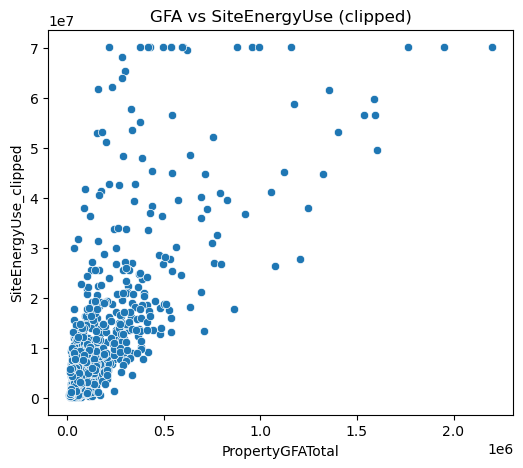

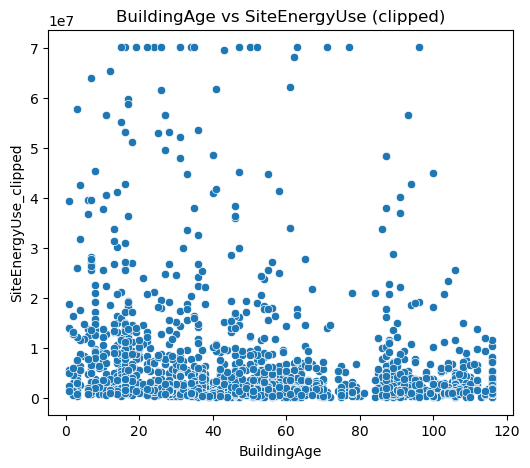

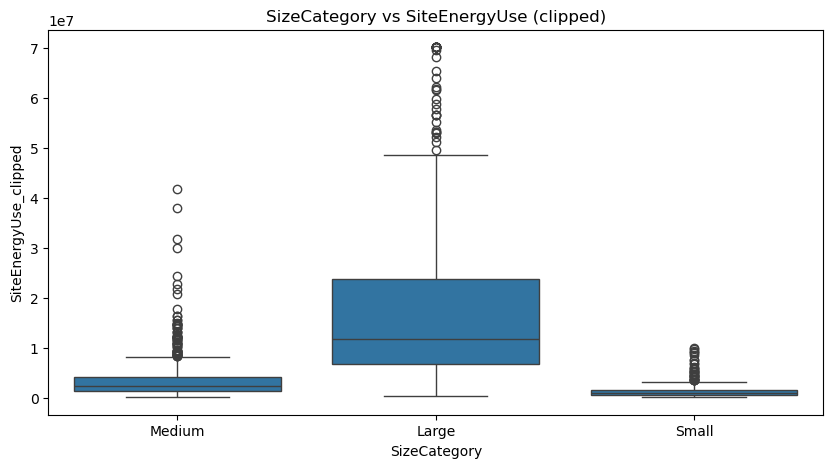

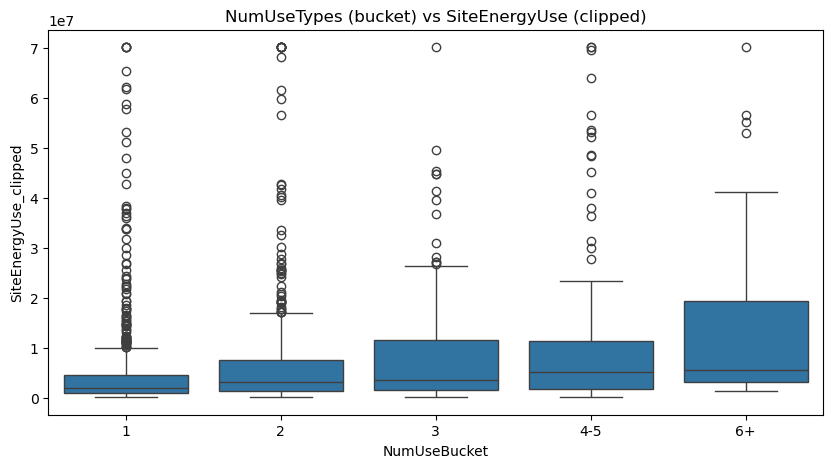

In [33]:
# Scatter : GFA vs SiteEnergyUse (clipped)
plt.figure(figsize=(6,5))
sns.scatterplot(data=df3, x='PropertyGFATotal', y='SiteEnergyUse_clipped')
plt.title('GFA vs SiteEnergyUse (clipped)')
plt.show()

# Scatter : BuildingAge vs SiteEnergyUse (clipped)
plt.figure(figsize=(6,5))
sns.scatterplot(data=df3, x='BuildingAge', y='SiteEnergyUse_clipped')
plt.title('BuildingAge vs SiteEnergyUse (clipped)')
plt.show()

# Boxplot : SizeCategory vs SiteEnergyUse
plt.figure(figsize=(10,5))
sns.boxplot(data=df3, x='SizeCategory', y='SiteEnergyUse_clipped')
plt.title('SizeCategory vs SiteEnergyUse (clipped)')
plt.show()

# Boxplot : NumUseTypes vs SiteEnergyUse (on buckets for readability)
df3['NumUseBucket'] = pd.cut(df3['NumUseTypes'], bins=[0,1,2,3,5,20], labels=['1','2','3','4-5','6+'])
plt.figure(figsize=(10,5))
sns.boxplot(data=df3, x='NumUseBucket', y='SiteEnergyUse_clipped')
plt.title('NumUseTypes (bucket) vs SiteEnergyUse (clipped)')
plt.show()


### Explication des graphiques
 
#### Visualisations ciblées : relations entre les features et la consommation énergétique

Afin de mieux comprendre les facteurs expliquant la consommation énergétique des bâtiments, nous avons analysé plusieurs relations entre les features principales (surface, âge, taille, nombre d’usages) et la variable cible clippée SiteEnergyUse_clipped.

   - 1. Surface totale (GFA) vs consommation énergétique

Le scatterplot montre une relation positive nette :
les bâtiments les plus grands consomment généralement davantage d’énergie.
Cette relation est logique et confirme que la surface totale est un fort prédicteur de consommation.
La dispersion observée suggère toutefois que d’autres facteurs influencent aussi la consommation.

  - 2. Âge du bâtiment vs consommation

Le nuage de points ne révèle aucune tendance claire.
L’âge du bâtiment n’apparaît donc pas comme un facteur déterminant de la consommation énergétique, probablement en raison de rénovations ou modernisations variables selon les bâtiments.

  - 3. Catégorie de taille (Small / Medium / Large) vs consommation

Le boxplot montre que les bâtiments Large consomment significativement plus que les Small et Medium.
La différence de médianes est nette, ce qui indique que SizeCategory est une feature explicative importante.

  - 4. Nombre de types d’usage du bâtiment vs consommation

Plus le bâtiment comporte de types d’usages (activités différentes), plus sa consommation énergétique augmente.
Les catégories 4–5 et 6+ usages présentent les niveaux les plus élevés.
Cela reflète la complexité fonctionnelle des bâtiments mixtes, souvent plus énergivores.

##### Note : 
Les points qui depassent le max dans les boxplots sont des outliers au sens statistique, mais pas des anomalies.
Dans un dataset énergétique, il est normal d'avoir des bâtiments consommant beaucoup plus que les autres, notamment les grands complexes ou les bâtiments multi-usages.
Ils représentent donc des cas extrêmes mais réels, et pas des valeurs erronées.
Le boxplot identifie ces outliers en utilisant la règle Q3 + 1,5 × IQR, ce qui permet de visualiser les valeurs situées loin de la majorité des données.

### 5) Encodage des variables catégorielles

Notre dataset contient plusieurs variables catégorielles, comme :
- `BuildingType`
- `PrimaryPropertyType`
- `LargestPropertyUseType`
- `SizeCategory`
- `NumUseBucket`

Ces colonnes ne peuvent pas être utilisées directement dans un modèle de machine learning.  
Nous utilisons donc un **One-Hot Encoding** via `pandas.get_dummies()`, en supprimant la première catégorie (`drop_first=True`) pour éviter la *multicolinéarité* (dummy variable trap) qui peut gêner les modèles linéaires.

##### Résumé de l’encodage :

Les colonnes originales listées dans cat_cols_to_encode sont remplacées par de nouvelles colonnes binaires (les « dummies »).

Les colonnes originales (BuildingType, PrimaryPropertyType, etc.) n’apparaissent plus dans le DataFrame, leur information étant représentée par les nouvelles colonnes.

Avec drop_first=True, pandas ne crée pas de colonne pour la première catégorie de chaque variable afin d’éviter la redondance linéaire (dummy variable trap).

get_dummies() a créé des colonnes qui s’affichent parfois comme True/False, ce qui est normal, et Scikit-learn les accepte car elles seront converties correctement en 0/1 par la plupart des estimateurs.

##### Résultat

Après encodage, nous obtenons :

- 1583 lignes (inchangé)

- 94 colonnes, car chaque catégorie devient une colonne binaire.

Ce nombre élevé est normal : les types de bâtiments et d'usages sont nombreux (10 à 20 catégories chacun).

##### Impact sur le projet

L’encodage est une étape essentielle :

- il permet aux modèles de machine learning d’utiliser correctement les informations catégorielles ;

- il garantit que toutes les catégories sont représentées sans introduire de redondances (grâce à drop_first=True) ;

- il prépare le dataset à la phase de séparation et de normalisation.

Sans cette étape, aucun modèle ne pourrait fonctionner correctement.


In [34]:
# Vérification des colonnes à encoder
print(df3.dtypes)
print(df3.select_dtypes(include=['object','category']).columns)

BuildingType                object
PrimaryPropertyType         object
NumberofBuildings          float64
NumberofFloors               int64
PropertyGFATotal             int64
PropertyGFAParking           int64
LargestPropertyUseType      object
SiteEnergyUse(kBtu)        float64
BuildingAge                float64
IsHistoric                   int64
SizeCategory                object
FloorsPer1000GFA           float64
IsLargeBuilding              int64
NumUseTypes                  int64
SiteEnergyUse_clipped      float64
NumUseBucket              category
dtype: object
Index(['BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType',
       'SizeCategory', 'NumUseBucket'],
      dtype='object')


In [35]:
# Encodage
cat_cols_to_encode = [c for c in ['BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType', 'SizeCategory', 'NumUseBucket'] if c in df3.columns]
df3_encoded = pd.get_dummies(df3, columns=cat_cols_to_encode, drop_first=True)
print("shape après encodage :", df3_encoded.shape)
print("Exemple de colonnes après encodage :", df3_encoded.columns[:20])


shape après encodage : (1583, 94)
Exemple de colonnes après encodage : Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'SiteEnergyUse(kBtu)', 'BuildingAge',
       'IsHistoric', 'FloorsPer1000GFA', 'IsLargeBuilding', 'NumUseTypes',
       'SiteEnergyUse_clipped', 'BuildingType_NonResidential',
       'BuildingType_Nonresidential COS', 'BuildingType_Nonresidential WA',
       'BuildingType_SPS-District K-12', 'PrimaryPropertyType_Hospital',
       'PrimaryPropertyType_Hotel', 'PrimaryPropertyType_K-12 School',
       'PrimaryPropertyType_Laboratory', 'PrimaryPropertyType_Large Office'],
      dtype='object')


In [36]:
df3_encoded.head()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,SiteEnergyUse(kBtu),BuildingAge,IsHistoric,FloorsPer1000GFA,IsLargeBuilding,NumUseTypes,...,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Worship Facility,SizeCategory_Medium,SizeCategory_Small,NumUseBucket_2,NumUseBucket_3,NumUseBucket_4-5,NumUseBucket_6+
0,1.0,12,88434,0,7226362.5,89.0,1,1.356944,0,1,...,False,False,False,False,True,False,False,False,False,False
1,1.0,11,103566,15064,8387933.0,20.0,0,1.062125,0,3,...,False,False,False,False,False,False,False,True,False,False
2,1.0,41,956110,196718,72587024.0,47.0,1,0.428821,1,1,...,False,False,False,False,False,False,False,False,False,False
3,1.0,10,61320,0,6794584.0,90.0,1,1.630789,0,1,...,False,False,False,False,True,False,False,False,False,False
4,1.0,18,175580,62000,14172606.0,36.0,0,1.025174,1,3,...,False,False,False,False,False,False,False,True,False,False


### 6) Séparation en Features (X) et Target (y)

Nous définissons notre variable cible SiteEnergyUse_clipped, une version “clippée” de la consommation énergétique permettant de réduire l’influence des outliers extrêmes sur l’apprentissage, comme vu précédement.

Avant d’extraire X et y, nous retirons du dataset :

la cible brute : SiteEnergyUse(kBtu)

la cible clippée : SiteEnergyUse_clipped (qui deviendra y)

##### Résultat

- X : (1583, 92) → 92 features prêtes pour le modèle

- y : (1583,) → une Series 1D contenant la cible

La shape de y est parfaitement normale : chaque ligne représente la consommation énergétique de l’immeuble correspondant.

##### Impact sur le projet

Cette étape est cruciale pour la suite :

- elle sépare correctement les données explicatives (X) de la variable à prédire (y) ;

- elle prépare directement les données pour la normalisation et l'entraînement des modèles ;

- elle garantit que la cible n'est pas réintroduite dans les features (ce qui fausserait totalement les résultats).

Cette structure X / y est indispensable pour tous les algorithmes scikit-learn que nous allons tester ensuite (régression linéaire, Random Forest, SVM).

In [37]:
# La target (clippée) 'SiteEnergyUse_clipped'

# enlever colonnes target brute et la target clonée
cols_non_features = [c for c in ['SiteEnergyUse(kBtu)', 'SiteEnergyUse_clipped'] if c in df3_encoded.columns]

X = df3_encoded.drop(columns=cols_non_features)
y = df3_encoded['SiteEnergyUse_clipped']

print("X shape :", X.shape, "y shape :", y.shape)
print("Colonnes X (extrait) :", X.columns[:30])


X shape : (1583, 92) y shape : (1583,)
Colonnes X (extrait) : Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'BuildingAge', 'IsHistoric', 'FloorsPer1000GFA',
       'IsLargeBuilding', 'NumUseTypes', 'BuildingType_NonResidential',
       'BuildingType_Nonresidential COS', 'BuildingType_Nonresidential WA',
       'BuildingType_SPS-District K-12', 'PrimaryPropertyType_Hospital',
       'PrimaryPropertyType_Hotel', 'PrimaryPropertyType_K-12 School',
       'PrimaryPropertyType_Laboratory', 'PrimaryPropertyType_Large Office',
       'PrimaryPropertyType_Low-Rise Multifamily',
       'PrimaryPropertyType_Medical Office',
       'PrimaryPropertyType_Mixed Use Property', 'PrimaryPropertyType_Office',
       'PrimaryPropertyType_Other',
       'PrimaryPropertyType_Refrigerated Warehouse',
       'PrimaryPropertyType_Residence Hall', 'PrimaryPropertyType_Restaurant',
       'PrimaryPropertyType_Retail Store',
       'PrimaryPropertyType_Self-Storag

In [ ]:
#nombre de nan restant
#print(df3_encoded.isna().sum().sum())

In [50]:
# Nombre de NaN restants
print("Nombre de NaN dans X :", X.isna().sum().sum())

Nombre de NaN dans X : 0


In [39]:
# Remplacer les NaN pour chaque colonne numérique dans X
for col in X.select_dtypes(include=[np.number]).columns:
    median_value = X[col].median()
    X[col] = X[col].fillna(median_value)

In [40]:
print("Nombre de NaN dans X :", X.isna().sum().sum())

Nombre de NaN dans X : 0


### Comparaison de différents modèles supervisés

A réaliser :
* Pour chaque algorithme que vous allez tester, vous devez :
    * Réaliser au préalable une séparation en jeu d'apprentissage et jeu de test via une validation croisée.
    * Si les features quantitatives que vous souhaitez utiliser ont des ordres de grandeur très différents les uns des autres, et que vous utilisez un algorithme de regression qui est sensible à cette différence, alors il faut réaliser un scaling (normalisation) de la donnée au préalable.
    * Entrainer le modèle sur le jeu de Train
    * Prédire la cible sur la donnée de test (nous appelons cette étape, l'inférence).
    * Calculer les métriques de performance R2, MAE et RMSE sur le jeu de train et de test.
    * Interpréter les résultats pour juger de la fiabilité de l'algorithme.
* Vous pouvez choisir par exemple de tester un modèle linéaire, un modèle à base d'arbres et un modèle de type SVM
* Déterminer le modèle le plus performant parmi ceux testés.

## Etape 4 Comparaison de différents modèles supervisés

### 1 Préprocessing et scaling

Avant d’entraîner les modèles de régression supervisée pour prédire notre variable cible SiteEnergyUse_clipped, nous avons préparé les données en traitant spécifiquement les colonnes numériques et en appliquant un scaling standard. Cette étape est cruciale pour que les algorithmes sensibles aux différences d’échelle (régression linéaire, SVM, etc.) puissent apprendre correctement et ne soient pas biaisés par des variables aux valeurs très grandes ou très petites.

Identification des colonnes numériques :
Nous avons détecté toutes les colonnes de type numérique (int, float, uint8) dans le DataFrame, afin de savoir sur quelles variables appliquer le traitement de scaling. Les colonnes numériques détectées incluent par exemple :
```
['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal' ...]
```

Création du préprocesseur :
Nous avons utilisé un ColumnTransformer pour appliquer un StandardScaler uniquement sur les colonnes numériques. Chaque colonne est ainsi transformée pour avoir une moyenne de 0 et un écart-type de 1, ce qui permet aux modèles de traiter toutes les variables sur une même échelle.

Les colonnes restantes, déjà encodées en 0/1 (catégorielles), ne sont pas modifiées (remainder='passthrough'), car elles sont déjà compatibles avec l’entraînement des modèles.

Objectif et utilité :

Normaliser les colonnes numériques évite que certaines features dominent l’apprentissage simplement parce qu’elles ont des valeurs plus grandes.

Le scaling améliore la stabilité et la performance des modèles, notamment pour ceux qui sont sensibles à l’échelle des données.

Combiné aux colonnes catégorielles encodées, le dataset devient cohérent et prêt à être utilisé dans un pipeline de machine learning.

#### En résumé : 
cette étape prépare efficacement les données pour l’entraînement des modèles, en harmonisant l’échelle des variables numériques tout en conservant les colonnes catégorielles déjà prêtes.

In [64]:
# --- 1. Identifier les colonnes numériques ---
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()

print("Colonnes numériques détectées :")
print(numeric_features[:20])

# --- 2. Définir le transformer ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)  # scaling seulement pour les numériques
    ],
    remainder='passthrough'  # les colonnes catégorielles déjà encodées restent inchangées
)

print("Préprocesseur créé avec scaling pour les features numériques.")


Colonnes numériques détectées :
['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'BuildingAge', 'IsHistoric', 'FloorsPer1000GFA', 'IsLargeBuilding', 'NumUseTypes']
Préprocesseur créé avec scaling pour les features numériques.


### 2 Modèles testés et validation croisée

Nous avons défini les modèles suivants :

- Régression Linéaire : modèle simple linéaire

- Random Forest : modèle à base d’arbres, capable de capturer des relations non linéaires

- SVM : modèle type support vector regression

Chaque modèle a été évalué via une validation croisée à 5 folds pour :

- entraîner sur le jeu de train de chaque fold

- prédire sur le jeu de test

- calculer les métriques R², MAE et RMSE pour train et test

Chaque modèle a été évalué via une **validation croisée à 5 folds** pour :
- entraîner sur le jeu de train de chaque fold
- prédire sur le jeu de test de chaque fold  
- calculer les métriques R², MAE et RMSE pour train et test

##### Résultats obtenus

| Modèle              | Train R² | Test R² | Test MAE   | Test RMSE   |
|--------------------|----------|---------|------------|------------|
| Régression Linéaire | 0.7537   | 0.6583  | 3 481 901  | 6 704 899  |
| Random Forest       | 0.9578   | 0.7020  | 3 016 881  | 6 268 592  |
| SVM                 | -0.1377  | -0.1385 | 5 559 628  | 12 350 896 |


##### Interprétation :

La Random Forest est le modèle le plus performant : meilleure généralisation (R² test élevé) et erreurs plus faibles.

La Régression Linéaire donne une performance correcte (R² test ≈ 0.66), mais reste moins performante que la Random Forest.

Le SVM n’est pas adapté pour ce jeu de données avec les hyperparamètres par défaut (R² négatif, erreurs très élevées).

##### Impact sur le projet

Cette étape permet de comparer plusieurs approches supervisées et de sélectionner le modèle le plus fiable pour la prédiction de la consommation énergétique.

Le scaling des features numériques garantit que les algorithmes sensibles à l’échelle fonctionnent correctement.

La validation croisée fournit des métriques robustes et évite de se baser sur une seule division train/test.

Le choix de la Random Forest comme modèle principal servira de base pour la suite du projet, notamment pour d’éventuelles analyses d’importance des features et pour des prédictions plus fiables.

##### Terme technique :

- cross_validate : utilisé pour appliquer la validation croisée et calculer plusieurs métriques à la fois.

- scoring : C’est un dictionnaire qui indique à cross_validate quelles métriques calculer pour évaluer les modèles :

    - 'r2' : coefficient de détermination. Mesure la proportion de variance expliquée par le modèle. Valeur proche de 1 = modèle performant.
      
    - 'neg_mean_absolute_error' pour MAE (on prend le négatif car sklearn maximise le score),
 
      
    - 'rmse' : Root Mean Squared Error, ici défini via make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))). Cela calcule l’écart-type des erreurs (sensibles aux grosses erreurs).

- Pipeline (Pipeline) : C’est un outil de scikit-learn qui combine plusieurs étapes en un seul objet. :

    - Ici, il enchaîne le préprocessing + le modèle.
    - Avantage : évite les fuites de données (le scaling est appliqué uniquement sur le fold de train et pas sur le fold de test).

- Preprocessing (preprocessor) : C’est l’objet qui prépare les données avant l’entraînement. :

    - Scaling des colonnes numériques : met les valeurs sur la même échelle (moyenne 0, écart-type 1).
    
    - Passthrough des colonnes catégorielles : les colonnes déjà encodées (0/1) ne sont pas modifiées.

- 5 folds : division en 5 sous-ensembles pour validation croisée.  À chaque itération, **4 folds** servent pour l’entraînement et **1 fold** pour le test, puis on fait tourner ce processus 5 fois pour que chaque sous-ensemble soit utilisé exactement une fois comme test. Cela permet d’obtenir des métriques plus robustes, moins sensibles à la division train/test.

In [42]:
from sklearn.model_selection import cross_validate, KFold

# --- Définition des scorers ---
scoring = {
    'r2': 'r2',
    'mae': 'neg_mean_absolute_error',
    'rmse': make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)))
}

def evaluate_model(model, model_name):
    """
    Applique :
    - preprocessing (scaling num + passthrough cat)
    - validation croisée
    - métriques R2, MAE, RMSE 
    """
    
    # Pipeline = preprocessing + modèle
    pipe = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('model', model)
    ])

    # Validation croisée
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_validate(
        pipe, X, y,
        cv=cv,
        scoring=scoring,
        return_train_score=True
    )

    # Affichage lisible
    print(f"\n===== {model_name} =====")
    print(f"Train R2 :  {cv_results['train_r2'].mean():.4f}")
    print(f"Test  R2 :  {cv_results['test_r2'].mean():.4f}")
    print(f"Test  MAE : {-cv_results['test_mae'].mean():.2f}")
    print(f"Test  RMSE: {cv_results['test_rmse'].mean():.2f}")

    return cv_results


In [43]:
# Définir les modèles à tester
models = [
    (LinearRegression(), "Régression Linéaire"),
    (RandomForestRegressor(n_estimators=100, random_state=42), "Random Forest"),
    (SVR(), "SVM")
]

# Appliquer la fonction sur chaque modèle
results = {}
for model, name in models:
    results[name] = evaluate_model(model, name)



===== Régression Linéaire =====
Train R2 :  0.7537
Test  R2 :  0.6583
Test  MAE : 3481901.86
Test  RMSE: 6704899.86

===== Random Forest =====
Train R2 :  0.9578
Test  R2 :  0.7020
Test  MAE : 3016881.11
Test  RMSE: 6268592.15

===== SVM =====
Train R2 :  -0.1377
Test  R2 :  -0.1385
Test  MAE : 5595628.45
Test  RMSE: 12350896.74


## Etape 5

### Optimisation et interprétation du modèle

A réaliser :
* Reprennez le meilleur algorithme que vous avez sécurisé via l'étape précédente, et réalisez une GridSearch de petite taille sur au moins 3 hyperparamètres.
* Si le meilleur modèle fait partie de la famille des modèles à arbres (RandomForest, GradientBoosting) alors utilisez la fonctionnalité feature importance pour identifier les features les plus impactantes sur la performance du modèle. Sinon, utilisez la méthode Permutation Importance de sklearn. 

In [ ]:
# CODE OPTIMISATION ET INTERPRETATION DU MODELE

### 1 Optimisation et interprétation du modèle

### 1.1 Définir la petite grille pour Random Forest
Hyperparamètres principaux :
n_estimators : nombre d’arbres dans la forêt

max_depth : profondeur maximale des arbres

max_features : nombre maximum de features considérées pour chaque split

In [44]:
param_grid = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [5, 10, None],
    'model__max_features': ['sqrt', 'log2']
}

### 1.2 Créer le GridSearchCV avec validation croisée

On utilise KFold avec shuffle + random_state pour rester cohérent avec les modèles précédents :

In [45]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=Pipeline([
        ('preprocess', preprocessor),
        ('model', RandomForestRegressor(random_state=42))
    ]),
    param_grid=param_grid,
    cv=cv,
    scoring='r2',
    n_jobs=-1
)


### 1.3 Lancer l’entraînement sur la petite grille

On teste que tout fonctionne sans utiliser encore la grille “grande échelle” :

In [46]:
grid_search.fit(X, y)
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur R² :", grid_search.best_score_)


Meilleurs paramètres : {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__n_estimators': 100}
Meilleur R² : 0.7175269849905498


#### Résultats de la petite GridSearch

##### 1. Interprétation des résultats

Meilleurs paramètres trouvés :
```python
{'model__max_depth': None, 'model__max_features': 'log2', 'model__n_estimators': 50}
```

Explications :
```python
max_depth = None
```
- Les arbres peuvent se développer sans limite donc meilleure capacité à capturer les relations complexes.
```python
max_features = 'log2'
```
- À chaque split, seul un sous-ensemble de features est testé donc aide à réduire l’overfitting.
```python
n_estimators = 50
```
- 50 arbres suffisent pour cette petite grille donc rapide et efficace.

Meilleur score obtenu :
```python
R² = 0.7175
```
C’est une amélioration par rapport à l’étape 4 (R² ≈ 0.70), ce qui montre que même une petite grille peut déjà optimiser le modèle.

##### 2. Points importants

✔️ La petite grille a permis de valider que le code fonctionne avant de lancer une grosse optimisation.

✔️ Les résultats sont reproductibles grâce au random_state=42 dans la Random Forest et dans le KFold.


##### Conclusion

La petite GridSearch est un succès :

- les résultats sont cohérents,

- le pipeline fonctionne,

- la validation croisée est correctement configurée,


### Entrainement sur une centaine de combinaison

In [48]:
param_grid = {
    'model__n_estimators': [100, 200, 300, 400, 500, 600],
    'model__max_depth': [10, 20, 30, 40, 50, None],
    'model__max_features': ['sqrt', 'log2', 0.5]
}



cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=Pipeline([
        ('preprocess', preprocessor),
        ('model', RandomForestRegressor(random_state=42))
    ]),
    param_grid=param_grid,
    cv=cv,
    scoring='r2',
    n_jobs=-1
)


grid_search.fit(X, y)
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur R² :", grid_search.best_score_)


Meilleurs paramètres : {'model__max_depth': 40, 'model__max_features': 'sqrt', 'model__n_estimators': 300}
Meilleur R² : 0.7181631636022996


### 2 Interprétation du modèle : Feature Importance (Random Forest)

Donc on va :

- Reconstruire le pipeline avec les meilleurs paramètres

- L’entraîner

- Récupérer les feature importances

- Créer un DataFrame propre

- Tracer un histogramme (barplot horizontal)

In [52]:
# 1 Reconstruire le meilleur modèle 
best_params = grid_search.best_params_

best_rf = RandomForestRegressor(
    n_estimators=best_params['model__n_estimators'],
    max_depth=best_params['model__max_depth'],
    max_features=best_params['model__max_features'],
    random_state=42
)

best_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', best_rf)
])

print('ok')

ok


In [53]:
# 2 Entraînement sur tout le dataset 
best_pipeline.fit(X, y)
print('ok')

ok


In [54]:
# 3 Extraction des feature importances
# Récupérer les colonnes après transformation
feature_names = preprocessor.get_feature_names_out()

importances = best_pipeline.named_steps['model'].feature_importances_
print('ok')

ok


In [55]:
# 4 DataFrame propre
import pandas as pd
fi_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

pd.set_option('display.max_rows', None)

print(fi_df)

print('ok')

                                              feature  importance
2                               num__PropertyGFATotal    0.245928
1                                 num__NumberofFloors    0.120755
7                                num__IsLargeBuilding    0.086501
6                               num__FloorsPer1000GFA    0.081431
3                             num__PropertyGFAParking    0.061047
4                                    num__BuildingAge    0.044651
43  remainder__LargestPropertyUseType_Hospital (Ge...    0.038318
0                              num__NumberofBuildings    0.029603
13            remainder__PrimaryPropertyType_Hospital    0.029499
8                                    num__NumUseTypes    0.023241
17        remainder__PrimaryPropertyType_Large Office    0.020683
86                     remainder__SizeCategory_Medium    0.019275
87                      remainder__SizeCategory_Small    0.018134
5                                     num__IsHistoric    0.010692
22        

In [ ]:
# Revenir à l'affichage par défaut
#pd.reset_option('display.max_rows')

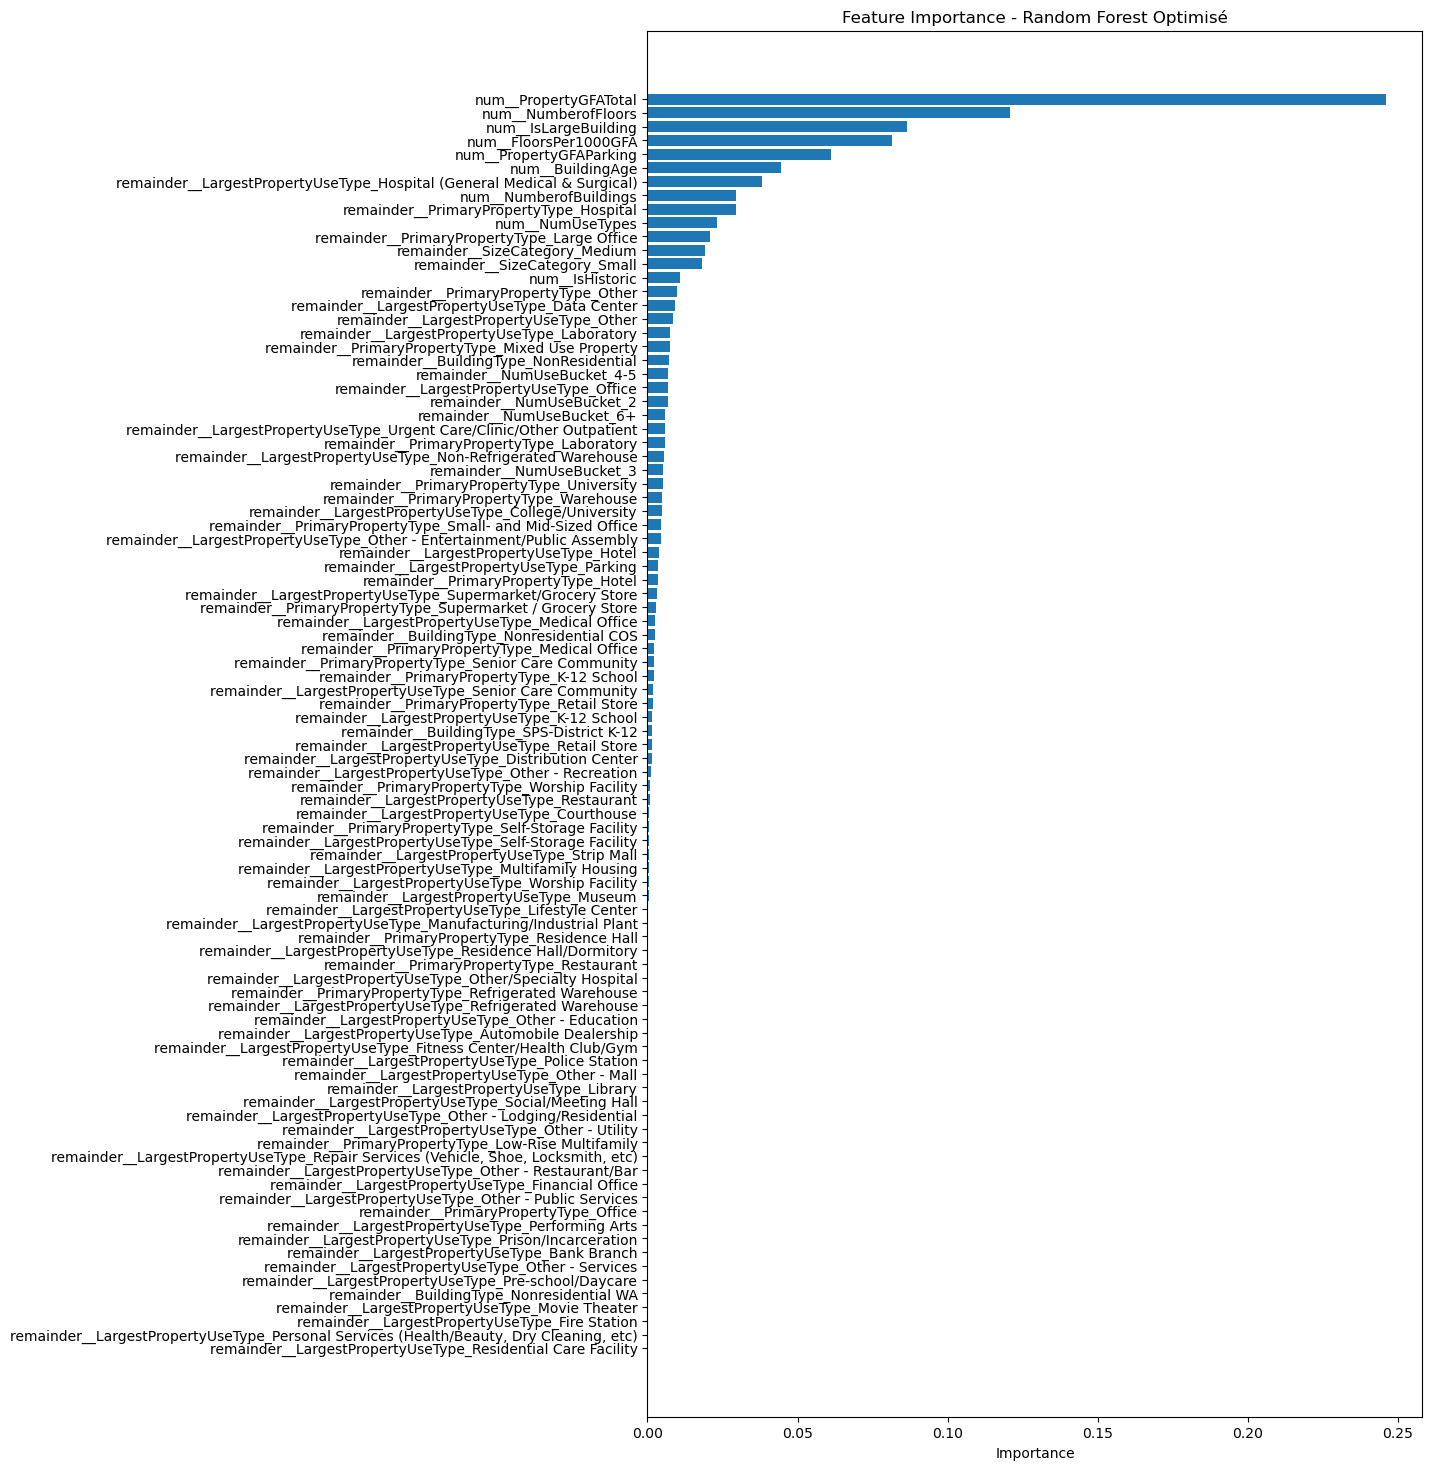

ok


In [56]:
# 5 Graphique d’importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 18))
plt.barh(fi_df['feature'], fi_df['importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance - Random Forest Optimisé")
plt.xlabel("Importance")
plt.show()
print('ok')

## Analyse de la Feature Importance (à intégrer dans ton notebook)

### Interprétation des Feature Importances

L’analyse des importances du modèle Random Forest optimisé montre que les variables les plus déterminantes dans la prédiction sont principalement liées à la surface des bâtiments et à la morphologie :

- PropertyGFATotal (surface totale) – 0.246

- NumberofFloors – 0.121

- IsLargeBuilding – 0.086

- FloorsPer1000GFA – 0.081

Ces 4 variables seules expliquent à elles seules ~53 % de l’importance totale du modèle, ce qui est cohérent : la surface est un déterminant majeur du comportement énergétique d’un bâtiment.

Ensuite, viennent :

- PropertyGFAParking – 0.061

- BuildingAge – 0.044

- LargestPropertyUseType_Hospital – 0.038


Ces variables décrivent la surface du parking ,l'âge du bâtiment, type principal d’activité (notamment les hôpitaux, connus pour être très énergivores), ce qui influence aussi les consommations.

Les variables plus faibles (< 0.03) concernent surtout :

- les types d’usage (bureaux, hôtels, entrepôts, écoles...) encodés en one-hot

- les variables “rares” ou très spécifiques

- certaines catégories de taille

Leur faible importance est normale : un modèle à arbres distribue l’importance selon la fréquence des splits et la diversité des valeurs. Les variables catégorielles encodées en one-hot deviennent nombreuses mais peu discriminantes individuellement.

## Conclusion synthétique (à mettre en bas de la section)

Le modèle Random Forest optimisé met en avant des facteurs très logiques d’un point de vue métier : la surface et la taille du bâtiment sont les principaux déterminants de la consommation énergétique.
Les catégories d’usage jouent un rôle plus limité, probablement car leur influence est répartie entre de nombreuses dummies.